In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [11]:
df.shape

(13320, 9)

drop availablity , area type , society and balcony

In [12]:
df2=df.drop(['area_type','availability','society','balcony'],axis=1)

In [13]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

Handling missing values


In [14]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

Feature Modification

In [15]:
df2['size']= df2['size'].apply(lambda y: str(y))
df2['size']

0            2 BHK
1        4 Bedroom
2            3 BHK
3            3 BHK
4            2 BHK
           ...    
13315    5 Bedroom
13316        4 BHK
13317        2 BHK
13318        4 BHK
13319        1 BHK
Name: size, Length: 13320, dtype: object

In [16]:

def convert_to_int(x):
    if x =='nan':
        return 0
    else: return int(x)


df3['bhk'] = df3['size'].apply(lambda x: convert_to_int(x.split(' ')[0]))
df3.head()

C:\Users\arama\AppData\Local\Temp\ipykernel_14272\3175678172.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: convert_to_int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [17]:
df3.drop('size',axis=1)

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5
13316,Richards Town,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Padmanabhanagar,4689,4.0,488.00,4


In [18]:
df3['total_sqft']

0        1056
1        2600
2        1440
3        1521
4        1200
         ... 
13315    3453
13316    3600
13317    1141
13318    4689
13319     550
Name: total_sqft, Length: 13246, dtype: object

In [19]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

df3[~df3['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [20]:
#  now we handle the data of total_sqft
def handle_sqft(x):
    x = str(x)
    y = x.split('-')
    if y==2:
        return float((y[0]+y[1])/2)
    try:
        return float(x)
    except:
        return None
df3['total_sqft']=df3['total_sqft'].apply(handle_sqft)


C:\Users\arama\AppData\Local\Temp\ipykernel_14272\637415833.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['total_sqft']=df3['total_sqft'].apply(handle_sqft)


In [21]:
df4=df3.drop('size',axis=1)
df4.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [22]:
df4.isnull().sum()

location        0
total_sqft    190
bath            0
price           0
bhk             0
dtype: int64

In [23]:
df4.dropna(inplace=True)
df4.isnull().sum()

location      0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

Feature Engineering 

In [24]:
df4['price per square feet'] = df4['price']*100000/df4['total_sqft']
df4.head()

,location,total_sqft,bath,price,bhk,price per square feet
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [25]:
df5 =df4.copy()

In [26]:
location_stats = df5['location'].value_counts(ascending=False)
location_stats

Whitefield                   517
Sarjapur  Road               386
Electronic City              302
Kanakpura Road               260
Thanisandra                  222
                            ... 
Rajanna Layout                 1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Sir M V Nagar                  1
Abshot Layout                  1
Name: location, Length: 1298, dtype: int64

Dimensionality Reduction 

In [27]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10


Ganga Nagar                  10
Nagadevanahalli              10
Nagappa Reddy Layout         10
ITPL                         10
BTM 1st Stage                10
                             ..
Rajanna Layout                1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Sir M V Nagar                 1
Abshot Layout                 1
Name: location, Length: 1059, dtype: int64

In [28]:
df5['location'] = df5['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
df5['location'].head()

0    Electronic City Phase II
1            Chikka Tirupathi
2                 Uttarahalli
3          Lingadheeranahalli
4                    Kothanur
Name: location, dtype: object

In [29]:
df5['location'].value_counts

<bound method IndexOpsMixin.value_counts of 0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316                       other
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13056, dtype: object>

Outlier Removal Using Business Logic 

As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [30]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]
df6.head()

,location,total_sqft,bath,price,bhk,price per square feet
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [31]:
df6.describe()

,total_sqft,bath,price,bhk,price per square feet
count,12312.000000,12312.000000,12312.000000,12312.000000,12312.000000
mean,1589.702335,2.562135,111.421129,2.651966,6323.403514
std,1261.895153,1.073093,152.771439,0.973438,4187.211055
min,300.000000,1.000000,9.000000,1.000000,267.829813
25%,1118.000000,2.000000,49.382500,2.000000,4208.545855
50%,1300.000000,2.000000,70.000000,3.000000,5300.000000
75%,1700.000000,3.000000,115.000000,3.000000,6938.987948
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


As there is a big gap or rande in average and max price per square feet so we remove outlier groupby location and use mean deviation and std deviation

In [32]:
df6.shape

(12312, 6)

In [33]:
def removeOutliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        x_mean = np.mean(subdf['price per square feet'])
        y_std = np.std(subdf['price per square feet'])
        reduce_df = subdf[(subdf['price per square feet']>(x_mean-y_std))&(subdf['price per square feet']<(x_mean+y_std))]
        df_out = pd.concat([df_out,reduce_df],ignore_index=True)
    return df_out

df7=removeOutliers(df6)
df7.head()


,location,total_sqft,bath,price,bhk,price per square feet
0,Devarachikkanahalli,1250.0,2.0,44.0,3,3520.000000
1,Devarachikkanahalli,1250.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,1200.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,1170.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,1425.0,2.0,65.0,3,4561.403509


In [34]:
df7.shape

(10150, 6)

In [35]:
def plot(df,location):
    df_x = df[(df['location'] ==location)&(df['bhk']==2)]
    df_y = df[(df['location'] ==location)&(df['bhk']==3)]
    plt.scatter(df_x.total_sqft,df_x.price,label='2 bhk',color='red',marker='*')
    plt.scatter(df_y.total_sqft,df_y.price,label='3 bhk',color='blue',marker='+')
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)

arrays_loc = df7['location'].value_counts()


There are still points where 2bhk price is higher than 3 bhk in same location. 

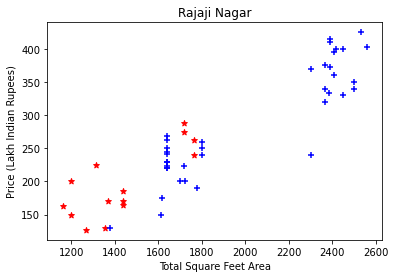

In [36]:
plot(df7,"Rajaji Nagar")


**We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.
**

{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}

In [37]:
# here we exclude those points of 3bhk which having value less than mean of 2bhk
# as we group by location and group by flat and compare with its previous one 

def removal_outlier_bhk (df):
    exclude_index = np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk_i,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk_i]={
                "mean" : np.mean(bhk_df['price per square feet']),
                "std" : np.std(bhk_df['price per square feet']),
                "count": bhk_df.shape[0]
            }
        for bhk_i,bhk_df in location_df.groupby('bhk'):
            bhk_prev = bhk_stats.get(bhk_i-1)
            if bhk_prev and bhk_prev['count']>5:
                exclude_index = np.append(exclude_index,bhk_df[bhk_df['price per square feet']<(bhk_prev['mean'])].index.values)
               
    return df.drop(exclude_index,axis='index')

df8=removal_outlier_bhk(df7)
df8.head()

            



,location,total_sqft,bath,price,bhk,price per square feet
1,Devarachikkanahalli,1250.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,1200.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,1170.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,1425.0,2.0,65.0,3,4561.403509
5,Devarachikkanahalli,947.0,2.0,43.0,2,4540.654699


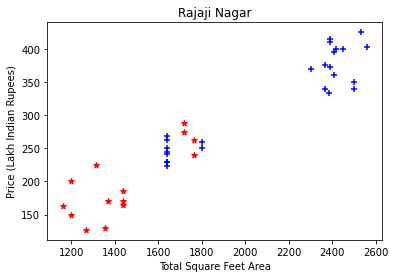

In [38]:
plot(df8,"Rajaji Nagar")

In [39]:
df8.shape

(7216, 6)

In [40]:
df7.shape

(10150, 6)

Text(0, 0.5, 'Count')

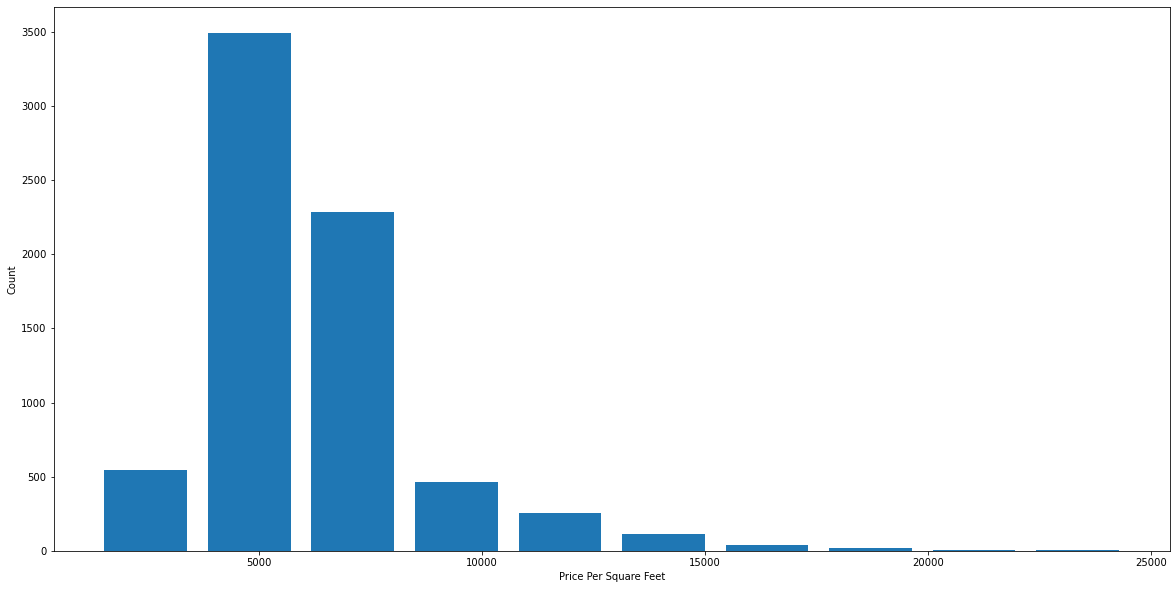

In [41]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8['price per square feet'],rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [42]:
df8.head()

,location,total_sqft,bath,price,bhk,price per square feet
1,Devarachikkanahalli,1250.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,1200.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,1170.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,1425.0,2.0,65.0,3,4561.403509
5,Devarachikkanahalli,947.0,2.0,43.0,2,4540.654699


## Removal of outlier using bathroom features 

In [43]:
df8.bath.unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'count')

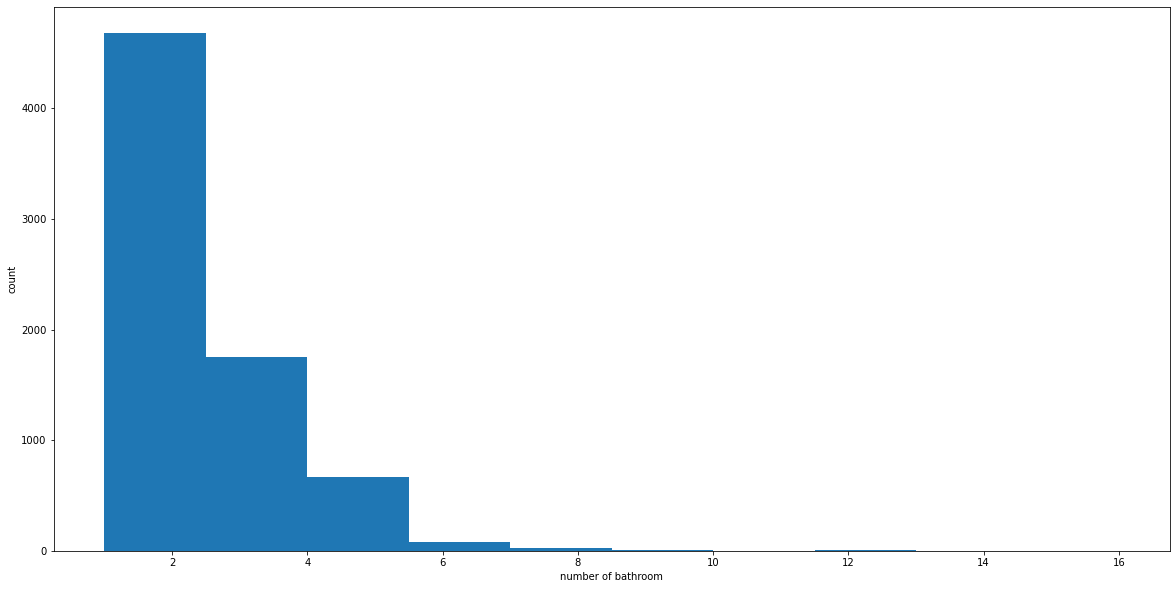

In [44]:
plt.hist(df8.bath)
plt.xlabel('number of bathroom')
plt.ylabel('count')

In [45]:
df9 =  df8[df8['bath']<df8['bhk']+2]
df9.shape

(7143, 6)

(array([4.679e+03, 1.751e+03, 6.470e+02, 3.800e+01, 1.900e+01, 6.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

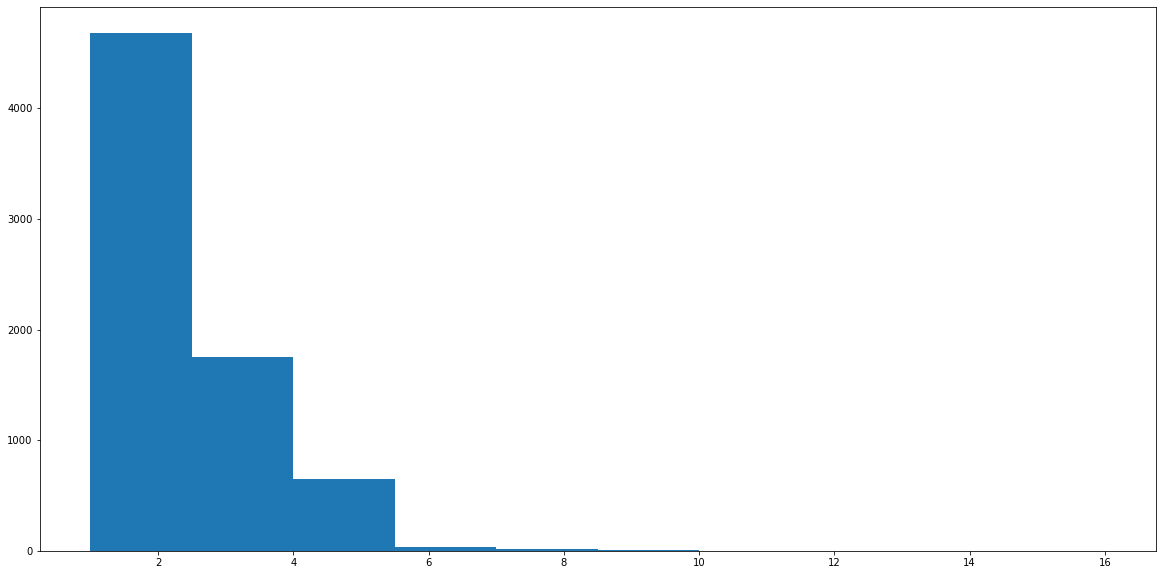

In [46]:
plt.hist(df9.bath)

In [47]:
df9.head()

,location,total_sqft,bath,price,bhk,price per square feet
1,Devarachikkanahalli,1250.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,1200.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,1170.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,1425.0,2.0,65.0,3,4561.403509
5,Devarachikkanahalli,947.0,2.0,43.0,2,4540.654699


In [48]:
df10 = df9.drop(['price per square feet'],axis=1)
df10.head()

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,43.0,2


### One hot encoding

In [49]:
dummies = pd.get_dummies(df10.location)

In [50]:
df10 = pd.concat([dummies,df10],axis= 1)

In [51]:
df10.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other,location,total_sqft,bath,price,bhk
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Devarachikkanahalli,1250.0,2.0,40.0,2
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Devarachikkanahalli,1200.0,2.0,83.0,2
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Devarachikkanahalli,1170.0,2.0,40.0,2
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Devarachikkanahalli,1425.0,2.0,65.0,3
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Devarachikkanahalli,947.0,2.0,43.0,2


In [52]:
df11 = df10.drop(['other','location'],axis= 1)
df11.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,total_sqft,bath,price,bhk
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1250.0,2.0,40.0,2
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1200.0,2.0,83.0,2
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1170.0,2.0,40.0,2
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1425.0,2.0,65.0,3
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,947.0,2.0,43.0,2


In [53]:
df11.shape

(7143, 243)

## Build a model 

In [54]:
x= df11.drop(['price'],axis=1)
y= df11.price

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.27)
x_train.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,total_sqft,bath,bhk
3028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1445.0,3.0,3
6884,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1050.0,2.0,2
4339,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1200.0,2.0,2
8469,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,596.0,1.0,1
6941,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1155.0,2.0,2


In [56]:
from sklearn.linear_model import LinearRegression
model_li = LinearRegression()
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(),x_train,y_train,cv=cv)

array([0.86048808, 0.8496896 , 0.8217401 , 0.79736503, 0.86041036])

#### We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose ####

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    score =[]
    cv= ShuffleSplit(n_splits=5,random_state=0,test_size=0.2)
    for algo_name, config in algos.items():
        clf = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        clf.fit(x,y)
        score.append(
            {
            'model':algo_name,
            'best_score':clf.best_score_,
            'best_params':clf.best_params_
            }
        )
    return pd.DataFrame(score,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)


c:\Users\arama\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\Users\arama\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

,model,best_score,best_params
0,linear_regression,0.825521,{'normalize': False}
1,lasso,0.691515,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.697287,"{'criterion': 'mse', 'splitter': 'best'}"


### Test the model for few properties 

In [58]:
data_=df9.to_csv('Data_.csv',index=False)

In [59]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from sklearn.model_selection import ShuffleSplit
sv = ShuffleSplit(n_splits=3,test_size=0.2)
cross_val_score(model,x_train,y_train,cv=sv)
model.fit(x_train,y_train)


LinearRegression()

In [60]:
model.score(x_test,y_test)

0.8187749177011736

In [61]:
x_train.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,total_sqft,bath,bhk
3028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1445.0,3.0,3
6884,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1050.0,2.0,2
4339,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1200.0,2.0,2
8469,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,596.0,1.0,1
6941,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1155.0,2.0,2


In [62]:
col = (x.columns)
input_format =np.zeros(len(col))

def predict_price(location,sqft,bath,bhk):  
    i=0  
    for key  in col:
        if key==location:input_format[i]=1
        elif key=='total_sqft':input_format[i]=sqft
        elif key=='bath':input_format[i]=bath
        elif key=='bhk':input_format[i]=bhk
        else: input_format[i]=0
        i = i+1
    return clf.predict([input_format])

In [63]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

c:\Users\arama\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([81.39099478])

In [64]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

c:\Users\arama\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([84.85105599])

In [65]:
predict_price('Indira Nagar',1000, 2, 2)

c:\Users\arama\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([178.45375523])

In [66]:
predict_price('Indira Nagar',1000, 3, 3)

c:\Users\arama\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([181.91381644])

## Export the trained model using joblib 

In [67]:
import joblib
joblib.dump(model,'real_state_predictor.joblib')


['real_state_predictor.joblib']

In [69]:
import joblib
clf = joblib.load('predictor.joblib')
# predict_price('Indira Nagar',1000, 2, 2)

In [70]:

import json
model_json ={
  'intercept':clf.intercept_.tolist(),
  'coef': clf.coef_.tolist(),
}

with open('model.json', 'w') as f:
    f.write(json.dumps(model_json))



columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))


